In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
df_tr=pd.read_csv('train.csv')     #load train data /content/drive/MyDrive/

In [5]:
df_tr.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_te=pd.read_csv('test.csv')     #load test data /content/drive/MyDrive/

In [8]:
df_te.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
df_tr.shape                          #no of rows=1460 and no of categories=81 for train data

(1460, 81)

In [10]:
df_te.shape                           #no of rows=1459 and no of categories=80 for test data

(1459, 80)

In [11]:
pd.options.display.max_rows=None

In [12]:
df_te.info()                  #reading features and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [13]:
df_tr['MSSubClass']=df_tr['MSSubClass'].astype('object')       #Here for mentioned columns datatypes are given wrong so we convert them correctly.
df_tr['OverallQual']=df_tr['OverallQual'].astype('object')
df_tr['OverallCond']=df_tr['OverallCond'].astype('object')

In [14]:
pd.options.display.max_rows=None ## removing all restriction to display all null values
df_tr.isnull().sum()                                   #checking missing values in train data

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [15]:
df_tr.info() ## checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [16]:
miss=df_tr.isnull().sum()

In [17]:
pd.options.display.max_rows=None
Miss1 = miss[miss>0].sort_values(ascending=False)
Miss1

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [18]:
Miss1/len(df_tr)*100           #percentage wise missing values in train data

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [64]:
#As we see the above columns contains missing values it has to be imputed so we impute numerical columns with median and categorical columns with mode

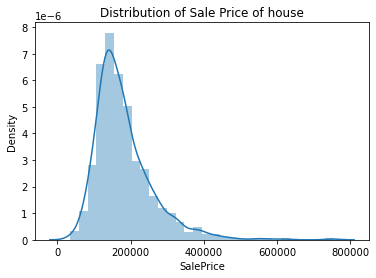

In [19]:
sns.distplot(df_tr['SalePrice'], bins=30)
plt.title('Distribution of Sale Price of house')

plt.show()

In [20]:
#data is not distributed normally as we can see its skewed on right direction and we can say that they are outliers and hence transformation is required 

In [21]:
#performing Bi.Variate analysis

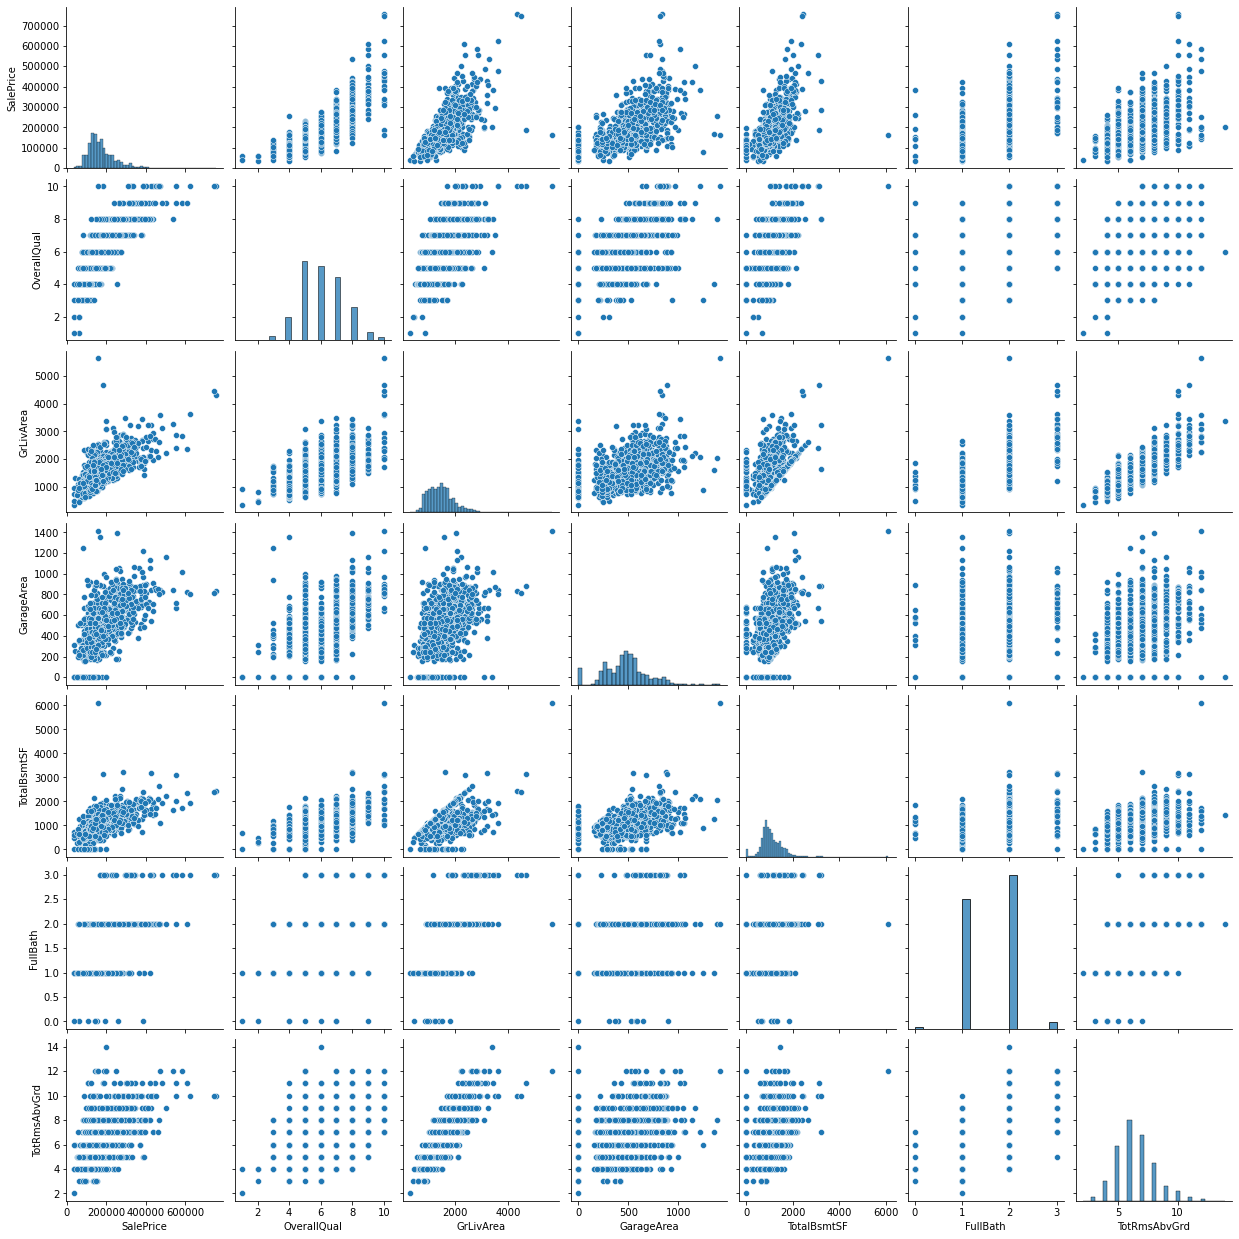

In [22]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd']

sns.pairplot(df_tr[cols], kind='scatter')

plt.show()

In [65]:
df_tr['PoolQC']=df_tr['PoolQC'].fillna('No Pool')             #Imputing missing values as these 5records have more than 90%missing values and these are categorical columns and highest repeated value is None so, we kept it as None.
df_tr['MiscFeature']=df_tr['MiscFeature'].fillna('None')
df_tr['Alley']=df_tr['Alley'].fillna('No alley access')
df_tr['Fence']=df_tr['Fence'].fillna('No Fence')
df_tr['FireplaceQu']=df_tr['FireplaceQu'].fillna('No fire place')

In [66]:
miss=df_tr.isnull().sum()
Miss1 = miss[miss>0].sort_values(ascending=False)
Miss1
Miss1/len(df_tr)*100

LotFrontage     17.739726
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [67]:
df_tr.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [68]:
#Based on description of features we can see there are outliers in LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice

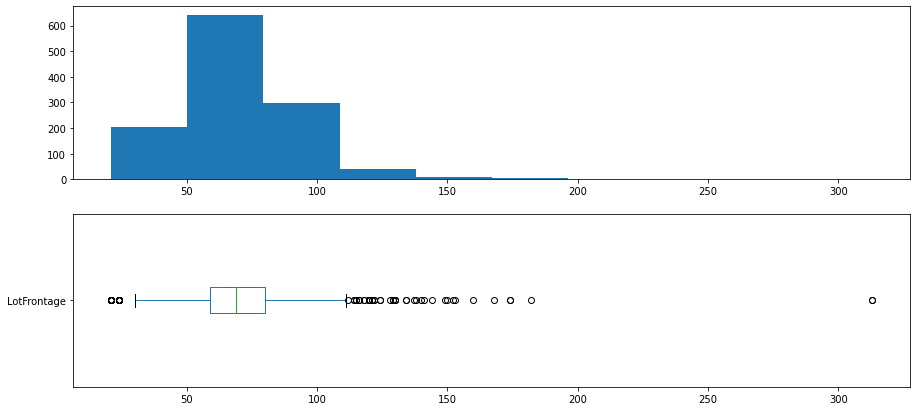

In [69]:
plt.figure(figsize=(15,7))
plt.subplot(211) 
plt.hist(df_tr['LotFrontage']) # Histogram
plt.subplot(212)
df_tr['LotFrontage'].plot(kind='box',vert=False) # Box Plot
plt.show()

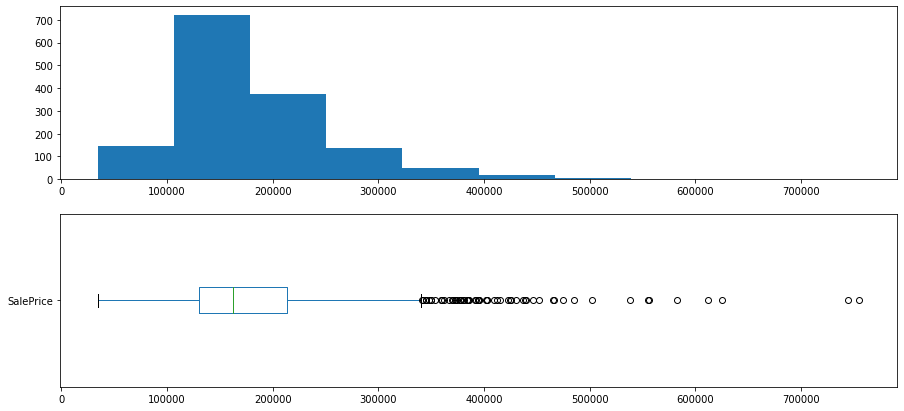

In [70]:
plt.figure(figsize=(15,7))
plt.subplot(211) 
plt.hist(df_tr['SalePrice']) # Histogram
plt.subplot(212)
df_tr['SalePrice'].plot(kind='box',vert=False) # Box Plot
plt.show()

In [71]:
#Here we can see data is skewed towards right as it contains outliers.

In [72]:
df_tr['LotFrontage']=df_tr['LotFrontage'].fillna(df_tr['LotFrontage'].median())  #As lotfrontage is numerical column we have imputed with median.

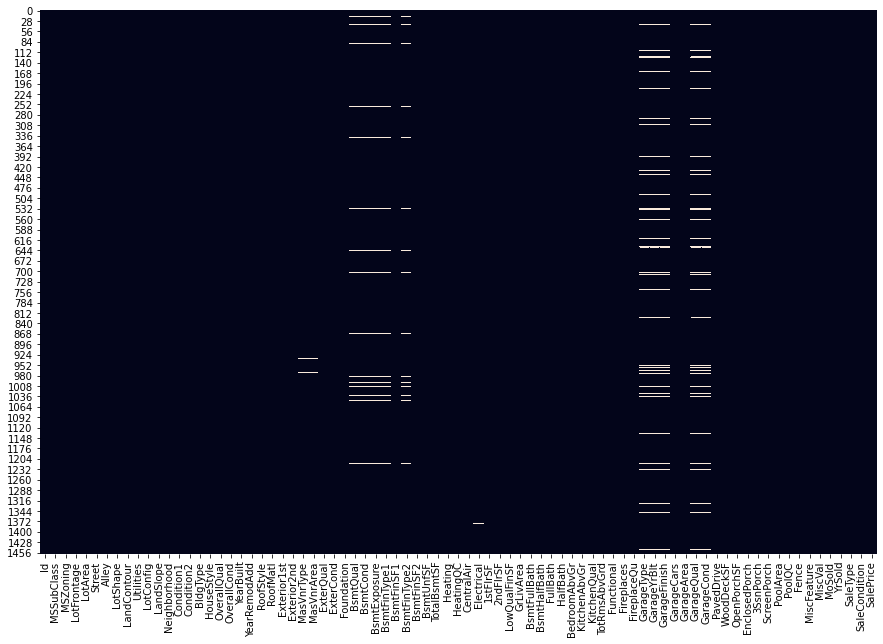

In [73]:
plt.figure(figsize=(15,10))         #Missing values present in the columns
sns.heatmap(df_tr.isnull(),cbar=False)
plt.show()

In [74]:
#Here garage qual, and garage cond  have missing values in same rows so we keep it as No Garage

In [75]:
df_tr['GarageCond']=df_tr['GarageCond'].fillna('No garage')
df_tr['GarageQual']=df_tr['GarageQual'].fillna('No garage')
df_tr['GarageFinish']=df_tr['GarageFinish'].fillna('No garage')
df_tr['GarageType']=df_tr['GarageType'].fillna('No garage')

In [76]:
miss=df_tr.isnull().sum()
Miss1 = miss[miss>0].sort_values(ascending=False)
Miss1
Miss1/len(df_tr)*100

GarageYrBlt     5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrArea      0.547945
MasVnrType      0.547945
Electrical      0.068493
dtype: float64

In [77]:
import datetime
dt=datetime.datetime.now()
yr=dt.year
print(yr)

2021


In [78]:
df_tr['GarageAge']=yr-df_tr['GarageYrBlt']    #Based on garageyrbuilt we can find age of Garage
df_tr['GarageAge']=df_tr['GarageAge'].fillna(0)

In [79]:
df_tr.drop('GarageYrBlt',axis=1,inplace=True)


In [80]:
df_tr.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageAge
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No fire place,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500,18.0
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500,45.0


In [81]:
df_tr['BsmtFinType2']=df_tr['BsmtFinType2'].fillna('No basement')    #As the mentioned columns has missing values in same rows we kept it as No basement. 
df_tr['BsmtExposure']=df_tr['BsmtExposure'].fillna('No basement')
df_tr['BsmtFinType1']=df_tr['BsmtFinType1'].fillna('No basement')
df_tr['BsmtCond']=df_tr['BsmtCond'].fillna('No basement')
df_tr['BsmtQual']=df_tr['BsmtQual'].fillna('No basement')

In [82]:
df_tr['MasVnrArea']=df_tr['MasVnrArea'].fillna(0)            #Both columns has missing values at same rows so we kept is 0 and None
df_tr['MasVnrType']=df_tr['MasVnrType'].fillna('None')

In [83]:
df_tr['Electrical'].value_counts()                    #Electrical system for each dwellings 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

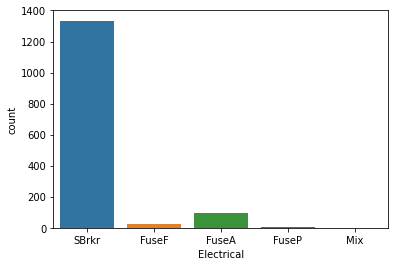

In [84]:
sns.countplot(df_tr['Electrical'])

In [85]:
#Here we can see SBrkr is given has electrical supply to max number of dwellings.

In [86]:
pd.crosstab(df_tr['Electrical'],df_tr['MSSubClass'],margins=True)

MSSubClass,20,30,40,45,50,60,70,75,80,85,90,120,160,180,190,All
Electrical,,,,,,,,,,,,,,,,
FuseA,31,18,2,3,20,0,8,2,0,0,5,0,0,0,5,94
FuseF,5,4,0,2,8,0,2,0,1,0,4,0,0,0,1,27
FuseP,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,3
Mix,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
SBrkr,500,45,2,7,116,299,50,14,56,20,42,87,63,10,23,1334
All,536,69,4,12,144,299,60,16,57,20,52,87,63,10,30,1459


In [88]:
#we can notice that SBrkr,FuseA has majority of electrical system given for dwellings.

In [89]:
df_tr[df_tr['Electrical'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageAge
1379,1380,80,RL,73.0,9735,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,...,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,No fire place,BuiltIn,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,No Pool,No Fence,None,0,5,2008,WD,Normal,167500,14.0


In [90]:
df_tr['Electrical']=df_tr['Electrical'].fillna('FuseA') ## as the Central Air and heating QC of majority is same we go with Fuse A

In [91]:
df_tr[(df_tr['CentralAir']=='Y') & (df_tr['HeatingQC']=='Gd')]['Electrical'].value_counts()


SBrkr    208
FuseA     17
FuseF      2
Mix        1
Name: Electrical, dtype: int64

In [92]:
miss=df_tr.isnull().sum()                               #Missing values imputed in train data.
Miss1 = miss[miss>0].sort_values(ascending=False)
Miss1
Miss1/len(df_tr)*100

Series([], dtype: float64)

In [93]:
num_data_tr=df_tr.select_dtypes(np.number)   #checking numerical columns

num_data_tr.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,GarageAge
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,18.0
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,45.0
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,20.0
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,23.0
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,21.0


In [94]:
col=num_data_tr.columns
mel_num=pd.melt(df_tr,value_vars=col)
mel_num.head()                           

,variable,value
0,Id,1.0
1,Id,2.0
2,Id,3.0
3,Id,4.0
4,Id,5.0


In [95]:
len(col)

35

In [96]:
mel_num.shape

(51100, 2)

<Figure size 1080x1080 with 0 Axes>

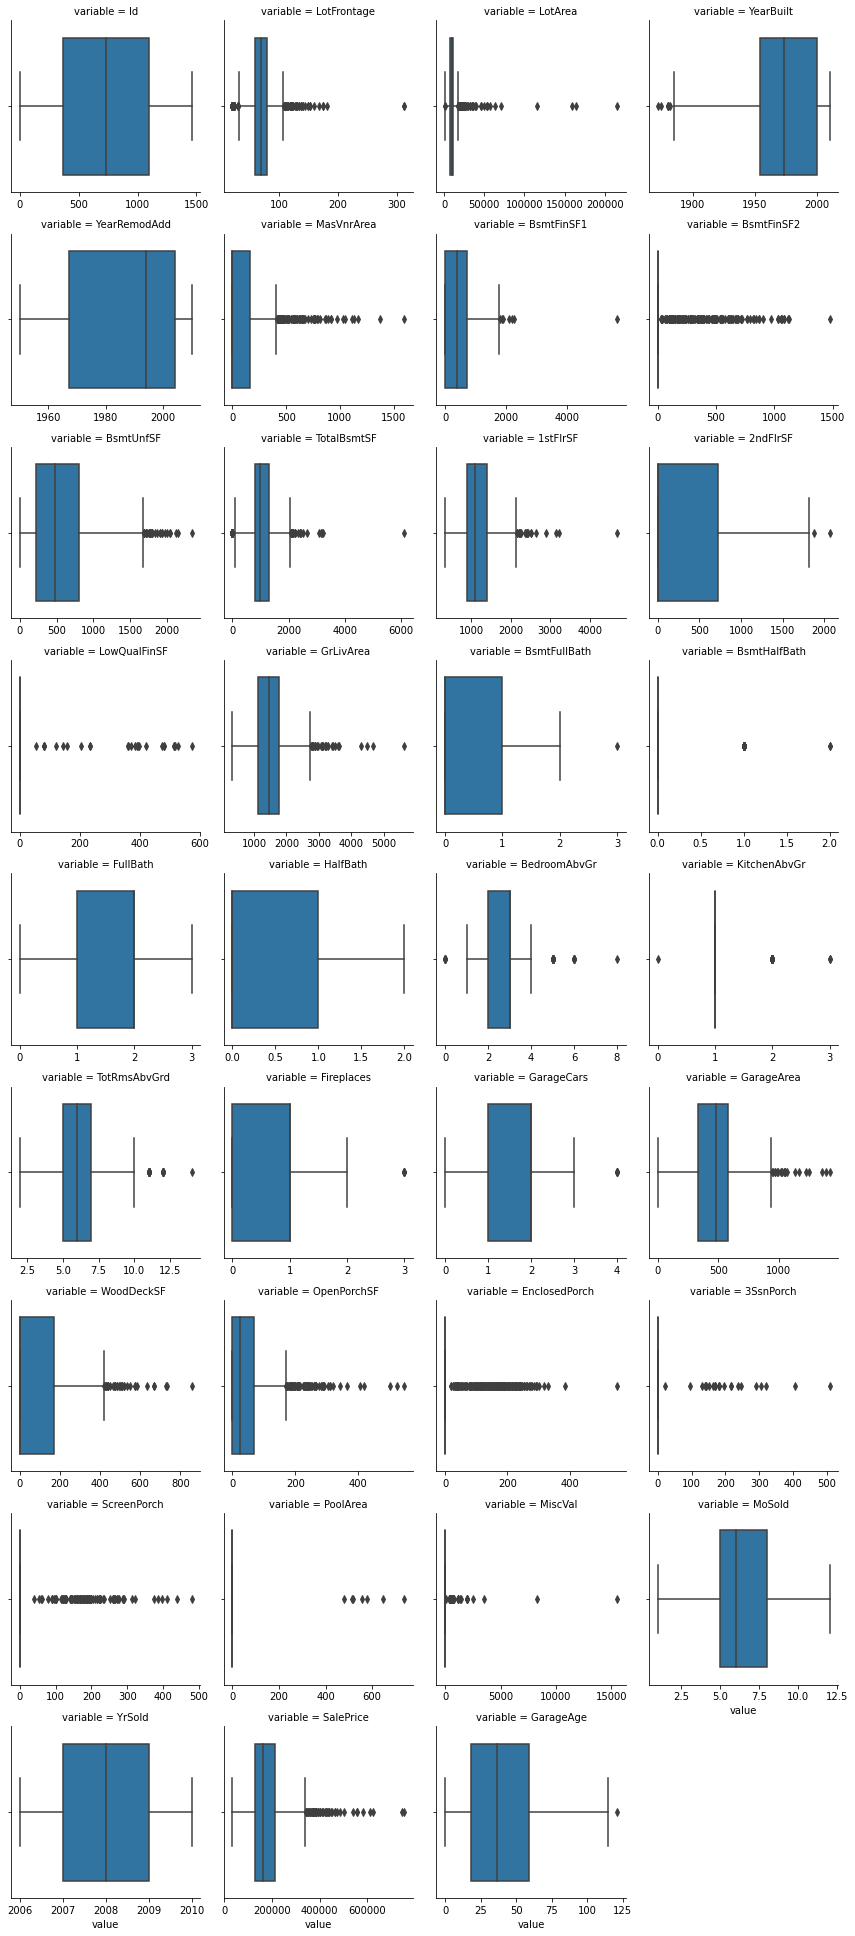

In [97]:
plt.figure(figsize=(15,15))
grid=sns.FacetGrid(mel_num,col='variable',col_wrap=4,sharex=False,sharey=False)
grid=grid.map(sns.boxplot,'value')
plt.show()

In [98]:
#LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSf2, BsmtUnfSF, TotalBsmtSF, 1stFirSF, 2ndFirSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, BedroomAbvGr, KitchAbvGr,TotRmsAbvGrd, Fireplaces,GarageCars, GarageArea, WoodDeskSF, OpenPorchSF, EnclosedPorch, 35snPorch, ScreenPorch, PoolArea, MiscVal, and GarageAge has right skewed Data
#YearBuilt has left skewed data

In [99]:
df_tr.corr()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,GarageAge
Id,1.000000,-0.009921,-0.033226,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,0.005011
LotFrontage,-0.009921,1.000000,0.304522,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771,-0.023601
LotArea,-0.033226,0.304522,1.000000,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.050809
YearBuilt,-0.012713,0.116685,0.014228,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,-0.636498
YearRemodAdd,-0.021998,0.083348,0.013788,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,-0.530041
MasVnrArea,-0.051071,0.178469,0.103321,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614,-0.183093
BsmtFinSF1,-0.005024,0.214367,0.214103,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,-0.098714
BsmtFinSF2,-0.005968,0.042463,0.111170,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378,0.095672
BsmtUnfSF,-0.007940,0.124098,-0.002618,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479,-0.160083
TotalBsmtSF,-0.015415,0.363472,0.260833,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581,-0.228684


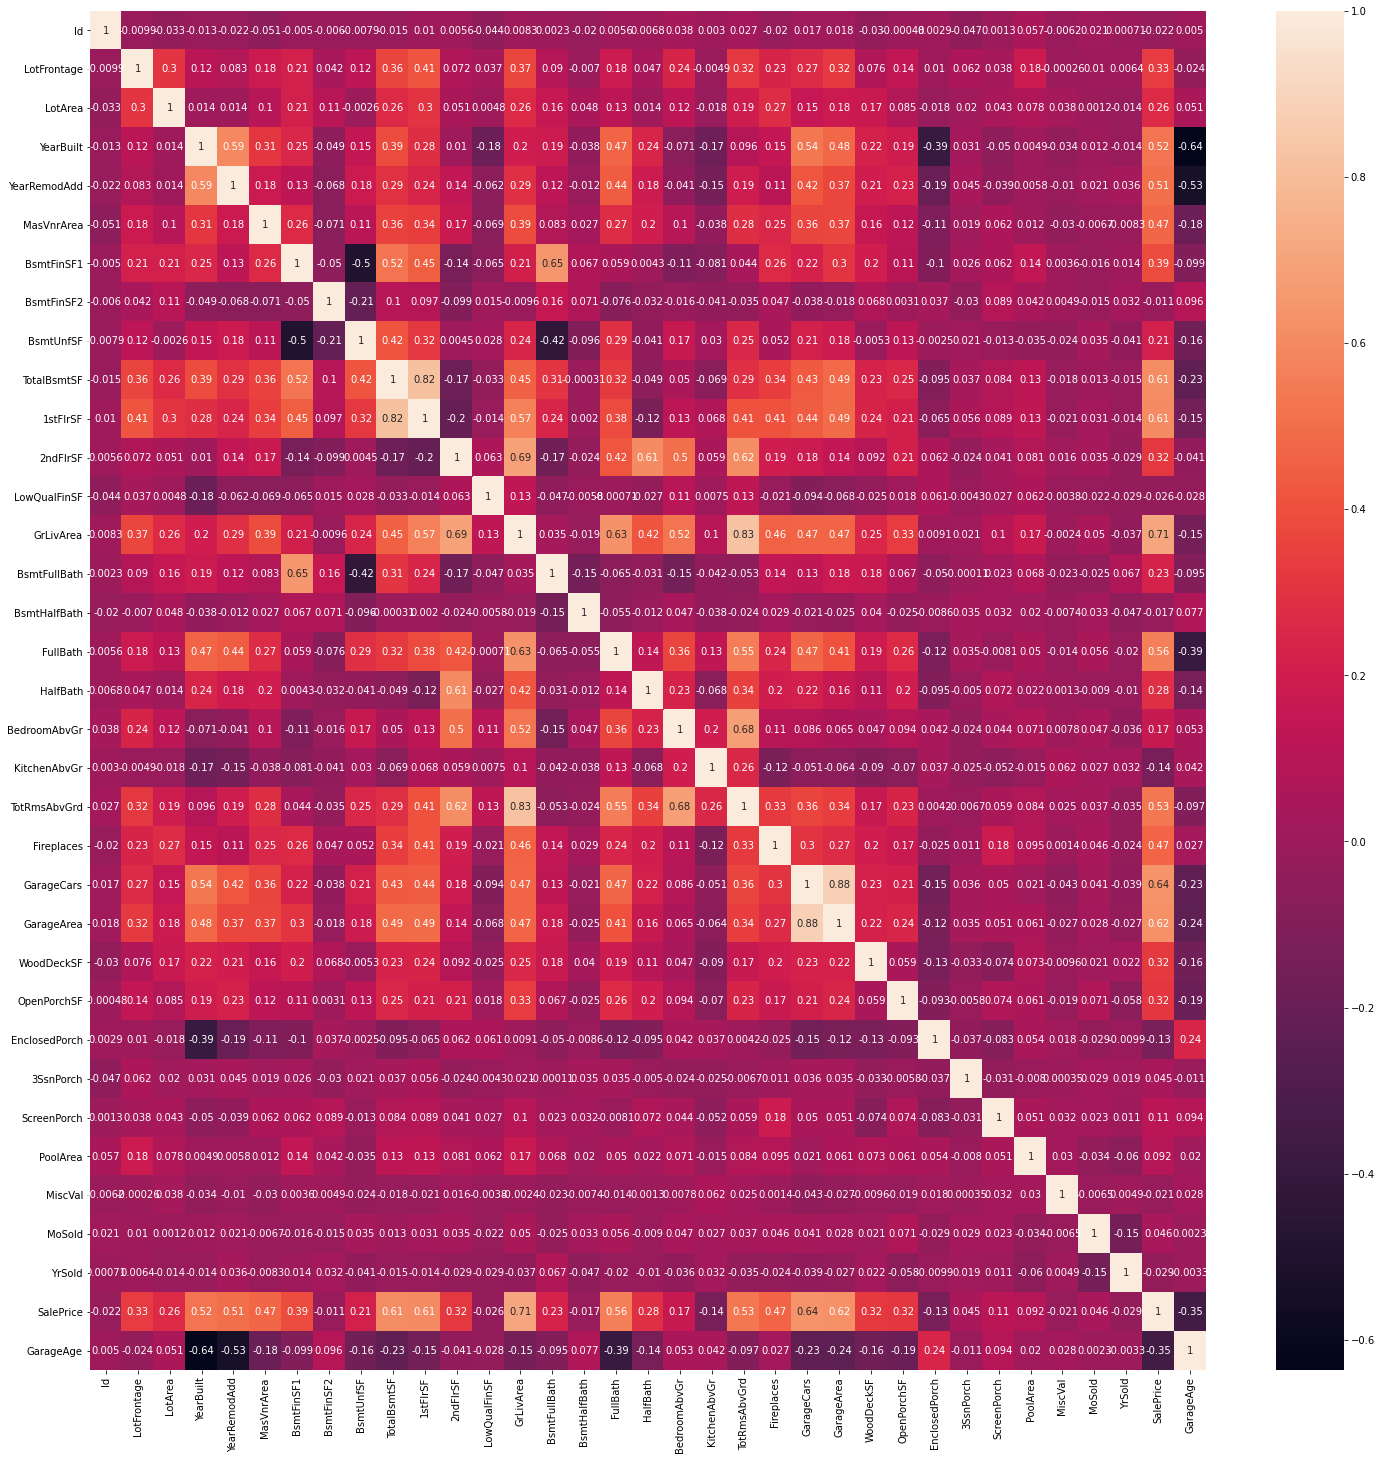

In [100]:
plt.figure(figsize=(25,25))
sns.heatmap(df_tr.corr(),annot=True)

In [101]:
#Here we can see  the features that are most correlated with the 'SalePrice'.OverallQual, GrLivArea, GarageCars and TotalBsmtSF are strongly correlated with the 'SalePrice'.GarageCars and GarageArea are also some of the most strongly correlated variables.Same goes for TotalBsmtSF and 1stFloor.

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor          #checking Multicollinearity
num=df_tr.select_dtypes(np.number)
vif=pd.DataFrame([variance_inflation_factor(num.values,i) for i in range(len(num.columns))],num.columns)

In [103]:
vif.sort_values(by=0,ascending=False)

,0
1stFlrSF,inf
2ndFlrSF,inf
GrLivArea,inf
BsmtFinSF1,inf
BsmtFinSF2,inf
BsmtUnfSF,inf
TotalBsmtSF,inf
LowQualFinSF,inf
YrSold,2.843867e+04
YearRemodAdd,1.825962e+04


In [104]:
df_te.info()      #checking datatype for test data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [105]:
df_te['MSSubClass']=df_te['MSSubClass'].astype('object')      #Imputing missing values same as train data.
df_te['OverallQual']=df_te['OverallQual'].astype('object')
df_te['OverallCond']=df_te['OverallCond'].astype('object')

In [106]:
df_te.info() ## checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   object 
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   object 
 18  OverallC

In [107]:
pd.options.display.max_rows=None ## removing all restriction to display all null values
df_te.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [108]:
miss=df_te.isnull().sum()
Miss1 = miss[miss>0].sort_values(ascending=False)
Miss1

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [109]:
Miss1/len(df_te)*100

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageCond       5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
KitchenQual      0.068540
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
dtype: float64

In [110]:
df_te['PoolQC']=df_te['PoolQC'].fillna('No Pool')
df_te['MiscFeature']=df_te['MiscFeature'].fillna('None')
df_te['Alley']=df_te['Alley'].fillna('No alley access')
df_te['Fence']=df_te['Fence'].fillna('No Fence')
df_te['FireplaceQu']=df_te['FireplaceQu'].fillna('No fire place')

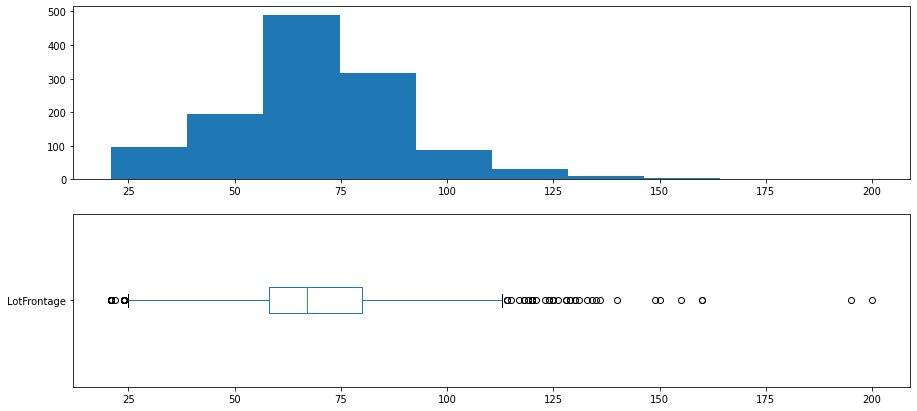

In [111]:
plt.figure(figsize=(15,7))
plt.subplot(211) 
plt.hist(df_te['LotFrontage']) # Histogram
plt.subplot(212)
df_te['LotFrontage'].plot(kind='box',vert=False) # Box Plot
plt.show()

In [112]:
df_te['LotFrontage']=df_te['LotFrontage'].fillna(df_te['LotFrontage'].median())


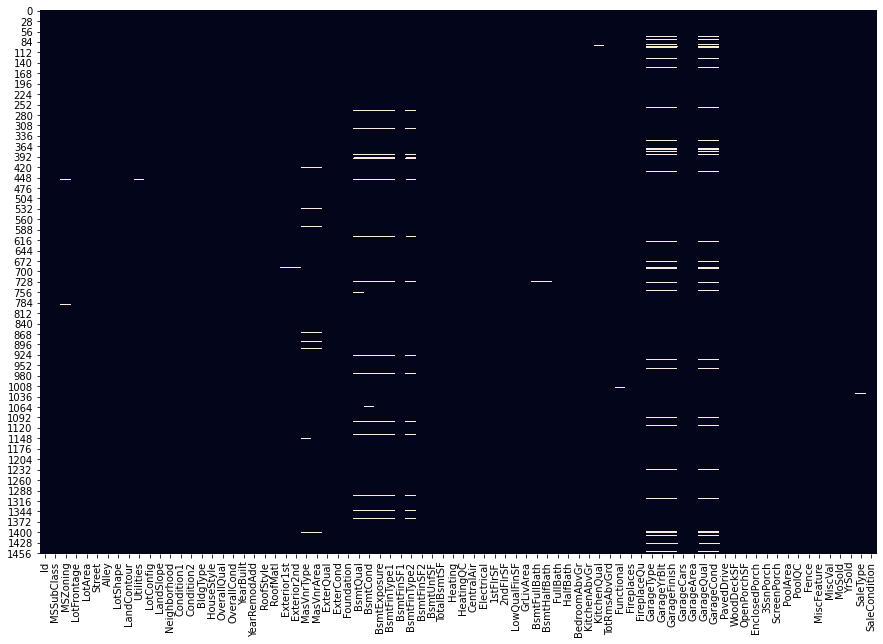

In [113]:
plt.figure(figsize=(15,10))
sns.heatmap(df_te.isnull(),cbar=False)
plt.show()

In [114]:
df_te['GarageCond']=df_te['GarageCond'].fillna('No garage')
df_te['GarageQual']=df_te['GarageQual'].fillna('No garage')
df_te['GarageFinish']=df_te['GarageFinish'].fillna('No garage')
df_te['GarageType']=df_te['GarageType'].fillna('No garage')

In [115]:
miss=df_te.isnull().sum()
Miss1 = miss[miss>0].sort_values(ascending=False)
Miss1/len(df_te)*100

GarageYrBlt     5.346127
BsmtCond        3.084304
BsmtQual        3.015764
BsmtExposure    3.015764
BsmtFinType2    2.878684
BsmtFinType1    2.878684
MasVnrType      1.096642
MasVnrArea      1.028101
MSZoning        0.274160
BsmtFullBath    0.137080
BsmtHalfBath    0.137080
Functional      0.137080
Utilities       0.137080
BsmtUnfSF       0.068540
BsmtFinSF2      0.068540
GarageArea      0.068540
BsmtFinSF1      0.068540
TotalBsmtSF     0.068540
KitchenQual     0.068540
GarageCars      0.068540
Exterior2nd     0.068540
Exterior1st     0.068540
SaleType        0.068540
dtype: float64

In [116]:
import datetime
dt=datetime.datetime.now()
yr=dt.year
print(yr)

2021


In [117]:
df_te['GarageAge']=yr-df_te['GarageYrBlt']
df_te['GarageAge']=df_te['GarageAge'].fillna(0)

In [118]:
df_te.drop('GarageYrBlt',axis=1,inplace=True)
df_te.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageAge
0,1461,20,RH,80.0,11622,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No fire place,Attchd,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No Pool,MnPrv,None,0,6,2010,WD,Normal,60.0
1,1462,20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No fire place,Attchd,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal,63.0
2,1463,60,RL,74.0,13830,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No Pool,MnPrv,None,0,3,2010,WD,Normal,24.0
3,1464,60,RL,78.0,9978,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No Pool,No Fence,None,0,6,2010,WD,Normal,23.0
4,1465,120,RL,43.0,5005,Pave,No alley access,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No fire place,Attchd,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,No Pool,No Fence,None,0,1,2010,WD,Normal,29.0


In [119]:
miss=df_te.isnull().sum()
Miss1 = miss[miss>0].sort_values(ascending=False)
Miss1/len(df_te)*100

BsmtCond        3.084304
BsmtQual        3.015764
BsmtExposure    3.015764
BsmtFinType2    2.878684
BsmtFinType1    2.878684
MasVnrType      1.096642
MasVnrArea      1.028101
MSZoning        0.274160
Utilities       0.137080
Functional      0.137080
BsmtHalfBath    0.137080
BsmtFullBath    0.137080
Exterior1st     0.068540
Exterior2nd     0.068540
SaleType        0.068540
GarageArea      0.068540
BsmtFinSF2      0.068540
BsmtUnfSF       0.068540
TotalBsmtSF     0.068540
KitchenQual     0.068540
GarageCars      0.068540
BsmtFinSF1      0.068540
dtype: float64

In [120]:
df_te['BsmtFinType2']=df_te['BsmtFinType2'].fillna('No basement')
df_te['BsmtExposure']=df_te['BsmtExposure'].fillna('No basement')
df_te['BsmtFinType1']=df_te['BsmtFinType1'].fillna('No basement')
df_te['BsmtCond']=df_te['BsmtCond'].fillna('No basement')
df_te['BsmtQual']=df_te['BsmtQual'].fillna('No basement')

In [121]:
miss=df_te.isnull().sum()
Miss1 = miss[miss>0].sort_values(ascending=False)
Miss1/len(df_te)*100

MasVnrType      1.096642
MasVnrArea      1.028101
MSZoning        0.274160
Utilities       0.137080
Functional      0.137080
BsmtHalfBath    0.137080
BsmtFullBath    0.137080
BsmtFinSF1      0.068540
Exterior1st     0.068540
Exterior2nd     0.068540
SaleType        0.068540
BsmtFinSF2      0.068540
GarageArea      0.068540
TotalBsmtSF     0.068540
KitchenQual     0.068540
GarageCars      0.068540
BsmtUnfSF       0.068540
dtype: float64

In [122]:
df_te.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageAge
0,1461,20,RH,80.0,11622,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No fire place,Attchd,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No Pool,MnPrv,None,0,6,2010,WD,Normal,60.0
1,1462,20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No fire place,Attchd,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal,63.0
2,1463,60,RL,74.0,13830,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No Pool,MnPrv,None,0,3,2010,WD,Normal,24.0


In [124]:
df_te['MasVnrType']=df_te['MasVnrType'].fillna('No Masionary veneer')       #Numerical categories are imputed with median and Categorical features with mode
df_te['MSZoning']=df_te['MSZoning'].fillna('RL')
df_te['MasVnrArea']=df_te['MasVnrArea'].fillna(df_te['MasVnrArea'].median())
df_te['BsmtHalfBath']=df_te['BsmtHalfBath'].fillna(df_te['BsmtHalfBath'].median())
df_te['BsmtFullBath']=df_te['BsmtFullBath'].fillna(df_te['BsmtFullBath'].median())
df_te['BsmtFinSF1']=df_te['BsmtFinSF1'].fillna(df_te['BsmtFinSF1'].median())
df_te['GarageCars']=df_te['GarageCars'].fillna(df_te['GarageCars'].median())
df_te['BsmtUnfSF']=df_te['BsmtUnfSF'].fillna(df_te['BsmtUnfSF'].median()) 
df_te['BsmtFinSF2']=df_te['BsmtFinSF2'].fillna(df_te['BsmtFinSF2'].median())  
df_te['GarageArea']=df_te['GarageArea'].fillna(df_te['GarageArea'].median())
df_te['TotalBsmtSF']=df_te['TotalBsmtSF'].fillna(df_te['TotalBsmtSF'].median())

In [125]:
df_te['Utilities']=df_te['Utilities'].fillna('AllPub')
df_te['Functional']=df_te['Functional'].fillna('Typ')
df_te['Functional']=df_te['Functional'].fillna('Typ')  
df_te['Exterior1st']=df_te['Exterior1st'].fillna('VinylSd')
df_te['Exterior2nd']=df_te['Exterior2nd'].fillna('VinylSd') 
df_te['SaleType']=df_te['SaleType'].fillna('WD')
df_te['KitchenQual']=df_te['KitchenQual'].fillna('TA') 


In [126]:
miss=df_te.isnull().sum()
Miss1 = miss[miss>0].sort_values(ascending=False)
Miss1/len(df_te)*100

Series([], dtype: float64)

In [127]:
df_te.shape

(1459, 80)

In [128]:
df_te.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageAge
0,1461,20,RH,80.0,11622,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No fire place,Attchd,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No Pool,MnPrv,None,0,6,2010,WD,Normal,60.0
1,1462,20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No fire place,Attchd,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal,63.0


In [129]:
from sklearn.preprocessing import LabelEncoder       #In order to build model ,categorical features has to be converted to machine readable form so label encoding is done.
LE=LabelEncoder()

In [130]:
pd.options.display.max_rows=None
df_tr.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageAge
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No fire place,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500,18.0
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500,45.0


In [132]:
#Label encoding  for train data

In [133]:
df_tr['MSZoning']=LE.fit_transform(df_tr['MSZoning'])
df_tr['Street']=LE.fit_transform(df_tr['Street'])
df_tr['Alley']=LE.fit_transform(df_tr['Alley'])
df_tr['LotShape']=LE.fit_transform(df_tr['LotShape'])
df_tr['LotConfig']=LE.fit_transform(df_tr['LotConfig'])
df_tr['LandSlope']=LE.fit_transform(df_tr['LandSlope'])
df_tr['LandContour']=LE.fit_transform(df_tr['LandContour'])
df_tr['Utilities']=LE.fit_transform(df_tr['Utilities'])
df_tr['Neighborhood']=LE.fit_transform(df_tr['Neighborhood'])
df_tr['Condition1']=LE.fit_transform(df_tr['Condition1'])
df_tr['Condition2']=LE.fit_transform(df_tr['Condition2'])
df_tr['BldgType']=LE.fit_transform(df_tr['BldgType'])
df_tr['HouseStyle']=LE.fit_transform(df_tr['HouseStyle'])
df_tr['RoofStyle']=LE.fit_transform(df_tr['RoofStyle'])
df_tr['RoofMatl']=LE.fit_transform(df_tr['RoofMatl'])
df_tr['Exterior1st']=LE.fit_transform(df_tr['Exterior1st'])
df_tr['Exterior2nd']=LE.fit_transform(df_tr['Exterior2nd'])
df_tr['MasVnrType']=LE.fit_transform(df_tr['MasVnrType'])
df_tr['ExterQual']=LE.fit_transform(df_tr['ExterQual'])
df_tr['ExterCond']=LE.fit_transform(df_tr['ExterCond'])
df_tr['Foundation']=LE.fit_transform(df_tr['Foundation'])
df_tr['BsmtQual']=LE.fit_transform(df_tr['BsmtQual'])
df_tr['BsmtCond']=LE.fit_transform(df_tr['BsmtCond'])
df_tr['BsmtExposure']=LE.fit_transform(df_tr['BsmtExposure'])
df_tr['BsmtFinType1']=LE.fit_transform(df_tr['BsmtFinType1'])
df_tr['BsmtFinType2']=LE.fit_transform(df_tr['BsmtFinType2'])
df_tr['Heating']=LE.fit_transform(df_tr['Heating'])
df_tr['HeatingQC']=LE.fit_transform(df_tr['HeatingQC'])
df_tr['CentralAir']=LE.fit_transform(df_tr['CentralAir'])
df_tr['Electrical']=LE.fit_transform(df_tr['Electrical'])
df_tr['KitchenQual']=LE.fit_transform(df_tr['KitchenQual'])
df_tr['Functional']=LE.fit_transform(df_tr['Functional'])  
df_tr['FireplaceQu']=LE.fit_transform(df_tr['FireplaceQu'])
df_tr['GarageType']=LE.fit_transform(df_tr['GarageType'])
df_tr['GarageFinish']=LE.fit_transform(df_tr['GarageFinish'])
df_tr['GarageQual']=LE.fit_transform(df_tr['GarageQual'])
df_tr['GarageCond']=LE.fit_transform(df_tr['GarageCond'])
df_tr['PavedDrive']=LE.fit_transform(df_tr['PavedDrive'])
df_tr['PoolQC']=LE.fit_transform(df_tr['PoolQC'])
df_tr['Fence']=LE.fit_transform(df_tr['Fence'])
df_tr['MiscFeature']=LE.fit_transform(df_tr['MiscFeature'])
df_tr['SaleType']=LE.fit_transform(df_tr['SaleType'])
df_tr['SaleCondition']=LE.fit_transform(df_tr['SaleCondition'])

In [134]:
#Label encoding for test data

In [135]:
df_te['MSZoning']=LE.fit_transform(df_te['MSZoning'])
df_te['Street']=LE.fit_transform(df_te['Street'])
df_te['Alley']=LE.fit_transform(df_te['Alley'])
df_te['LotShape']=LE.fit_transform(df_te['LotShape'])
df_te['LotConfig']=LE.fit_transform(df_te['LotConfig'])
df_te['LandSlope']=LE.fit_transform(df_te['LandSlope'])
df_te['LandContour']=LE.fit_transform(df_te['LandContour'])
df_te['Utilities']=LE.fit_transform(df_te['Utilities'])
df_te['Neighborhood']=LE.fit_transform(df_te['Neighborhood'])
df_te['Condition1']=LE.fit_transform(df_te['Condition1'])
df_te['Condition2']=LE.fit_transform(df_te['Condition2'])
df_te['BldgType']=LE.fit_transform(df_te['BldgType'])
df_te['HouseStyle']=LE.fit_transform(df_te['HouseStyle'])
df_te['RoofStyle']=LE.fit_transform(df_te['RoofStyle'])
df_te['RoofMatl']=LE.fit_transform(df_te['RoofMatl'])
df_te['Exterior1st']=LE.fit_transform(df_te['Exterior1st'])
df_te['Exterior2nd']=LE.fit_transform(df_te['Exterior2nd'])
df_te['MasVnrType']=LE.fit_transform(df_te['MasVnrType'])
df_te['ExterQual']=LE.fit_transform(df_te['ExterQual'])
df_te['ExterCond']=LE.fit_transform(df_te['ExterCond'])
df_te['Foundation']=LE.fit_transform(df_te['Foundation'])
df_te['BsmtQual']=LE.fit_transform(df_te['BsmtQual'])
df_te['BsmtCond']=LE.fit_transform(df_te['BsmtCond'])
df_te['BsmtExposure']=LE.fit_transform(df_te['BsmtExposure'])
df_te['BsmtFinType1']=LE.fit_transform(df_te['BsmtFinType1'])
df_te['BsmtFinType2']=LE.fit_transform(df_te['BsmtFinType2'])
df_te['Heating']=LE.fit_transform(df_te['Heating'])
df_te['HeatingQC']=LE.fit_transform(df_te['HeatingQC'])
df_te['CentralAir']=LE.fit_transform(df_te['CentralAir'])
df_te['Electrical']=LE.fit_transform(df_te['Electrical'])
df_te['KitchenQual']=LE.fit_transform(df_te['KitchenQual'])
df_te['Functional']=LE.fit_transform(df_te['Functional'])  
df_te['FireplaceQu']=LE.fit_transform(df_te['FireplaceQu'])
df_te['GarageType']=LE.fit_transform(df_te['GarageType'])
df_te['GarageFinish']=LE.fit_transform(df_te['GarageFinish'])
df_te['GarageQual']=LE.fit_transform(df_te['GarageQual'])
df_te['GarageCond']=LE.fit_transform(df_te['GarageCond'])
df_te['PavedDrive']=LE.fit_transform(df_te['PavedDrive'])
df_te['PoolQC']=LE.fit_transform(df_te['PoolQC'])
df_te['Fence']=LE.fit_transform(df_te['Fence'])
df_te['MiscFeature']=LE.fit_transform(df_te['MiscFeature'])
df_te['SaleType']=LE.fit_transform(df_te['SaleType'])
df_te['SaleCondition']=LE.fit_transform(df_te['SaleCondition'])


In [136]:
df_tr.shape

(1460, 81)

In [137]:
df_te.shape

(1459, 80)

In [138]:
df_tr.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageAge
0,1,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,...,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4,208500,18.0
1,2,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,...,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4,181500,45.0
2,3,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,...,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4,223500,20.0
3,4,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,...,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0,140000,23.0
4,5,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,...,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4,250000,21.0


In [139]:
X=df_tr.drop(['Id','SalePrice'],axis=1)
y=df_tr['SalePrice']

In [140]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

In [141]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_squared_error

In [142]:
#Ordinary least square method

In [143]:
model = sm.OLS(y.astype(float), X.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              738.7
Date:                Thu, 26 Aug 2021   Prob (F-statistic):                        0.00
Time:                        04:11:00   Log-Likelihood:                         -17144.
No. Observations:                1460   AIC:                                  3.444e+04
Df Residuals:                    1383   BIC:                                  3.485e+04
Df Model:                          77                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass     -106.4760     44.840     -2.375      0.018    -194.439     -18.513
MSZoning       -857.2171   1591.048     -0.539      0.590   -3978.345    2263.911
LotFrontage    -153.1505     49.316     -3.105      0.002    -249.893     -56.408
LotArea           0.4139      0.105      3.929      0.000       0.207       0.621
Street         2.919e+04   1.39e+04      2.104      0.036    1980.203    5.64e+04
Alley          2632.1705   3721.345      0.707      0.479   -4667.920    9932.261
LotShape       -875.4109    651.193     -1.344      0.179   -2152.844     402.022
LandContour    3000.5281   1328.261      2.259      0.024     394.905    5606.151
Utilities     -5.621e+04   3.28e+04     -1.714      0.087   -1.21e+05    8116.024
LotConfig        37.1508    539.706      0.069      0.945   -1021.579    1095.881
LandSlope      5469.6563   3783.440      1.446      0.148   -1952.245    1.29e+04
Neighborhood    386.5457    153.056      2.526      0.012      86.299     686.792
Condition1     -951.0635   1002.150     -0.949      0.343   -2916.961    1014.834
Condition2    -9161.9731   3315.966     -2.763      0.006   -1.57e+04   -2657.107
BldgType      -3079.6548   1476.157     -2.086      0.037   -5975.403    -183.906
HouseStyle    -1143.9869    647.369     -1.767      0.077   -2413.919     125.945
OverallQual    1.087e+04   1172.122      9.271      0.000    8567.142    1.32e+04
OverallCond    5364.4465   1033.334      5.191      0.000    3337.376    7391.517
YearBuilt       219.3481     76.295      2.875      0.004      69.681     369.015
YearRemodAdd    -21.1698     66.870     -0.317      0.752    -152.347     110.007
RoofStyle      1951.6071   1111.918      1.755      0.079    -229.620    4132.834
RoofMatl       5294.2113   1490.311      3.552      0.000    2370.697    8217.725
Exterior1st   -1015.9868    515.489     -1.971      0.049   -2027.211      -4.763
Exterior2nd     420.4025    466.301      0.902      0.367    -494.331    1335.136
MasVnrType     4359.1103   1572.916      2.771      0.006    1273.552    7444.669
MasVnrArea       34.1098      6.021      5.665      0.000      22.299      45.921
ExterQual     -9799.5830   1942.907     -5.044      0.000   -1.36e+04   -5988.219
ExterCond       765.8144   1239.550      0.618      0.537   -1665.786    3197.415
Foundation      955.5769   1632.305      0.585      0.558   -2246.485    4157.639
BsmtQual      -4143.1157   1016.806     -4.075      0.000   -6137.765   -2148.467
BsmtCond       1210.9531    953.979      1.269      0.205    -660.449    3082.355
BsmtExposure  -3670.2751    872.441     -4.207      0.000   -5381.726   -1958.824
BsmtFinType1   -661.3345    511.362     -1.293      0.196   -1664.464     341.795
BsmtFinSF1        3.8244      2.

In [144]:
residual=model.resid

import statsmodels.api as sm
from scipy.stats import jarque_bera
# H0: the data is normally distributed
# HA: the data is not normally distributed.

jarque_bera(residual)

(66601.9521205576, 0.0)

In [145]:
#here we can see that p-value<0.05 and hence reject null hypothesis and say data is not normally distributed.

In [146]:
from sklearn.metrics import mean_squared_error

ypred = model.predict(X_test)
ypred_train = model.predict(X_train)

mse = mean_squared_error(y_test,ypred)
print('The Mean Squared Error = ',mse)

The Mean Squared Error =  718842282.0459249


In [147]:
rmse=np.sqrt(mse)
rmse

26811.2342507003

In [ ]:
#Sequential Feature selector

In [ ]:
lr=LinearRegression()
sfs= SFS(lr,k_features='best',forward=True,cv=3)
sfs.fit(X,y)

features= list(sfs.k_feature_names_)

X1=X_train[features]

X2=X_test[features]


lr.fit(X1,y_train)


ypred_train = lr.predict(X1)
ypred_test  = lr.predict(X2)

rmse_train = np.sqrt(mean_squared_error(y_train, ypred_train))
rmse_test  = np.sqrt(mean_squared_error(y_test, ypred_test))

print('RMSE for train : ',rmse_train)
print('RMSE for test  :',rmse_test)

RMSE for train :  32006.811314264884
RMSE for test  : 33103.043207414594


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:
#Random forest regressor

In [ ]:
model=RandomForestRegressor(n_estimators=50)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))

Y_predict_train=model.predict(X_train)
Y_predict_test_rf=model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, Y_predict_train))
rmse_test  = np.sqrt(mean_squared_error(y_test, Y_predict_test_rf))

print('RMSE for train : ',rmse_train)
print('RMSE for test  :',rmse_test)

0.972473119428976
RMSE for train :  12796.425113279422
RMSE for test  : 27386.881120580463


In [ ]:
ID=df_te['Id']
len(ID)

1459

In [ ]:
data_te=df_te.drop('Id',axis=1)
predictions=model.predict(data_te)
final_df=pd.DataFrame()
final_df['Id']=ID
final_df['SalePrice']=predictions


,Id,SalePrice
0,1461,124836.66
1,1462,151630.00
2,1463,185467.28
3,1464,184654.64
4,1465,198113.56


In [ ]:
final_df.set_index('Id',inplace=True)
final_df.head()

,SalePrice
Id,
1461,124836.66
1462,151630.00
1463,185467.28
1464,184654.64
1465,198113.56


In [ ]:
final_df.to_csv('submission.csv')
!cp submission.csv "drive/My Drive/"

In [ ]:
final_df.to_csv('submission.csv')

In [ ]:
#Lasso regressor

In [ ]:
lasso_model=Lasso(alpha=1.0)
lasso_model.fit(X_train,y_train)


Y_predict_train=lasso_model.predict(X_train)
Y_predict_test=lasso_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, Y_predict_train))
rmse_test  = np.sqrt(mean_squared_error(y_test, Y_predict_test))

print('RMSE for train : ',rmse_train)
print('RMSE for test  :',rmse_test)

RMSE for train :  30813.216127978918
RMSE for test  : 34397.284493113024


In [ ]:
#Ridge regressor

In [ ]:
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(X_train,y_train)

Y_predict_train=ridge_model.predict(X_train)
Y_predict_test=ridge_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, Y_predict_train))
rmse_test  = np.sqrt(mean_squared_error(y_test, Y_predict_test))

print('RMSE for train : ',rmse_train)
print('RMSE for test  :',rmse_test)


RMSE for train :  30832.8225604962
RMSE for test  : 34373.1037161887
